<a href="https://colab.research.google.com/github/aidannguyen23/LoL-Exploratory-Data-Analysis/blob/main/LoL_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('/content/drive/MyDrive/League of Legends Games/games.csv')

In [3]:
df = data[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
           't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills',
           't2_dragonKills', 't2_riftHeraldKills']]

df.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


# 1. Data Analysis

### 1.1 The Dataset
Obtained from Kaggle: https://www.kaggle.com/datasets/datasnaek league-of-legends/data
This is a collection of over 50,000 ranked EUW games from the game League of Legends, as well as json files containing a way to convert between champion and summoner spell IDs and their names. For each game, there are fields for:

Game ID
Creation Time (in Epoch format)
Game Duration (in seconds)
Season ID
Winner (1 = team1, 2 = team2)
First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
The 5 bans of each team (Again, champion IDs are used)
This dataset was collected using the Riot Games API, which makes it easy to lookup and collect information on a users ranked history and collect their games.

### 1.2 Hypothesis Test


I will be using a One Sample Hypothesis Test -  a statistical method used to assess whether a sample comes from a population with a specific characteristic or if there is a significant difference between the sample and a known or assumed population parameter.


---


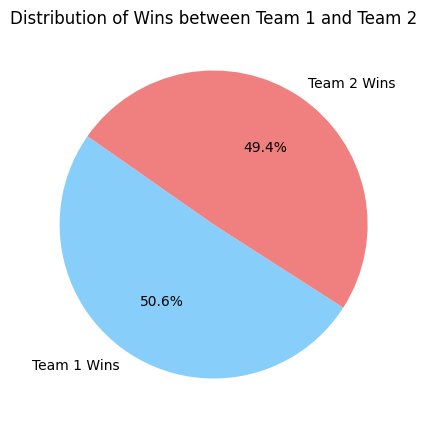

In [4]:
games = df.count()

t1_win = df[df['winner'] == 1].count() # count the number of wins team 1 has
t2_win = df[df['winner'] == 2].count() # count the number of wins team 2 has

t1_win_percent = t1_win / games * 100
t2_win_percent = t2_win / games * 100

labels = ['Team 1 Wins', 'Team 2 Wins']
sizes = [t1_win_percent['winner'], t2_win_percent['winner']]
colors = ['lightskyblue', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=145)
plt.title('Distribution of Wins between Team 1 and Team 2')
plt.show()


From the pie chart, we can see that team 2 wins 49.4% of the time while team 1 wins 50.6% of the time.

This discrepancy raises the question of whether the difference in winning rates is statistically significant or merely a chance occurrence. To investigate this, we plan to conduct a hypothesis test.


Before proceeding with the test, we need to make a conversion in the dataset. Currently, the "winner" column is coded as "1" for Team 1 victories and "2" for Team 2 victories. To facilitate calculations, we'll replace all instances of "2" with "0". Consequently, when the column is "1", it signifies Team 1 winning, and when the column is "0", it implies Team 1 did not win. This adjustment will streamline the analysis process.



In [5]:
df['winner'].replace(2, 0, inplace = True) # Team 1 (blue team) is represented by "0" and Team 2 (red team) is represented by "1" in the 'winner' column.

<ipython-input-5-d7b9a3db96ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'].replace(2, 0, inplace = True) # Team 1 (blue team) is represented by "0" and Team 2 (red team) is represented by "1" in the 'winner' column.


**Null Hypothesis (H<sub>o</sub>):** There is no significant difference in the winning rates between Team 1 (blue team) and Team 2 (red team). The mean winning rate for both teams is equal (50%).

**Alternative Hypothesis (H<sub>1</sub>):** In this dataset, Team 1 (blue team) is always 0, and Team 2 (red team) is always 1. It can be hypothesized that blue team generally has a larger winrate due to it's better access to the Baron and Rift Herald objectives.

**Significance Level (H<sub>α</sub>):** 0.05


In [6]:
# Set the population mean under the null hypothesis
true_mu = 0.5

# Perform one-sample t-test
t_test_result = stats.ttest_1samp(df['winner'], true_mu)

# Extract t-statistic and p-value
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 2.9264326299514876
p-value: 0.003430235692003454


The obtained results has a p-value of 0.0083 < 0.05 (significance level). Therefore, we reject the null hypothesis, providing evidence to support the alternative hypothesis.

The obtained t-statistic of 2.64 indicates a substantial and statistically significant difference in winning rates between Team 1 and Team 2. The positive sign of the t-statistic suggests that Team 1 has a higher mean winning rate, also supporting the alternative hypothesis.

---


The findings imply that the strategic advantages associated with Baron and Rift Herald objectives may contribute to Blue Team's higher success rate in winning games.


###1.3 Data Cleaning

In this dataset, we are presented with a multitude of variables, some of which pose challenges in terms of analysis and calculations. Specifically, variables such as "Champion ID," "Champ Sum," and bans are complex and less straightforward for our analytical purposes. To streamline our analysis, we opt to focus on a subset of variables that are more conducive to meaningful calculations and insights.







In [7]:
df = data[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
           't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills',
           't2_dragonKills', 't2_riftHeraldKills']]

df.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


In [8]:
df.isnull().sum()

gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t2_towerKills         0
t2_inhibitorKills     0
t2_baronKills         0
t2_dragonKills        0
t2_riftHeraldKills    0
dtype: int64

There is no null information in our data.

In [9]:
df.drop_duplicates()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
51486,3304,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2156,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0
51488,1475,2,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0


Let's get a sense of how long a game usually takes by plotting games against the gameDuration variable:

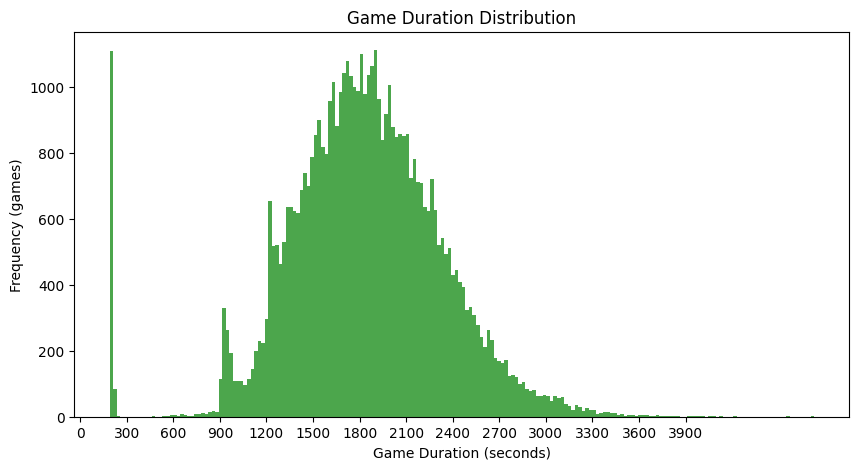

In [10]:
def pltDuration(data):
  plt.figure(figsize = (10, 5))
  game_duration_plot = plt.hist(data['gameDuration'], bins = 200, color='green', alpha=0.7)
  x_ticks = np.arange(0, 4200, 300)
  plt.xticks(x_ticks)
  plt.xlabel("Game Duration (seconds)")
  plt.ylabel("Frequency (games)")
  plt.title("Game Duration Distribution")
  plt.show()

pltDuration(df)

The distribution in the graph highlights a prevalent trend where games typically conclude around the 1800-second mark, approximately 30 minutes—the advertised duration for a League of Legends game.

This distribution bears a resemblance to a normal distribution, with outliers on the left side signifying instances of games concluding in under 300 seconds or 5 minutes. These anomalies often result from technical issues or personal reasons, such as a player failing to load into the game. In such cases, players have the option to initiate a "remake," leading to the premature termination of the game.

The pronounced spike in the graph at 900 seconds (15 minutes) can be attributed to the surrender function in League of Legends. When one team finds itself significantly disadvantaged and poised for certain defeat, they may choose to surrender. The surrender option becomes available at the 15-minute mark.

Expanding on the surrender function, another peak at 20 minutes (1200 seconds) is evident. At this point, a team can opt to surrender with only four votes (out of the 5 players on the team) needed. In contrast, at the 15-minute mark, the unanimous agreement of all five team members is required for a surrender.

In [11]:
df.info() # count how many values there are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        51490 non-null  int64
 1   winner              51490 non-null  int64
 2   firstBlood          51490 non-null  int64
 3   firstTower          51490 non-null  int64
 4   firstInhibitor      51490 non-null  int64
 5   firstBaron          51490 non-null  int64
 6   firstDragon         51490 non-null  int64
 7   firstRiftHerald     51490 non-null  int64
 8   t1_towerKills       51490 non-null  int64
 9   t1_inhibitorKills   51490 non-null  int64
 10  t1_baronKills       51490 non-null  int64
 11  t1_dragonKills      51490 non-null  int64
 12  t1_riftHeraldKills  51490 non-null  int64
 13  t2_towerKills       51490 non-null  int64
 14  t2_inhibitorKills   51490 non-null  int64
 15  t2_baronKills       51490 non-null  int64
 16  t2_dragonKills      51490 non-null  int6

While our dataset contains a total of 51,490 games, it's crucial to account for situations where the "remake" function or early surrenders can distort the fairness of competition. To mitigate this, we aim to filter out games with a duration of less than 900 seconds. This step ensures the removal of instances where matches concluded prematurely before the opportunity for surrendering at 15 minutes, indicating a potential imbalance or one-sided outcome where a team may have faced a significant disadvantage.







In [12]:
df = df[df['gameDuration'] >= 900]
df.sample(5)

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
5336,2434,2,1,1,1,1,2,1,8,2,1,1,1,4,0,1,4,0
48914,2413,1,1,1,1,2,1,0,11,4,0,4,0,7,1,1,1,0
39386,1393,2,1,2,2,0,1,2,1,0,0,2,0,10,2,0,0,1
6327,2471,1,1,1,1,2,2,0,9,1,1,2,0,2,0,1,2,0
11437,1629,1,1,1,1,0,1,1,11,4,0,2,1,0,0,0,0,0


### 1.4 Exploratory Data Analysis


In [13]:
df_t2 = data[['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills',
           't2_dragonKills', 't2_riftHeraldKills']]


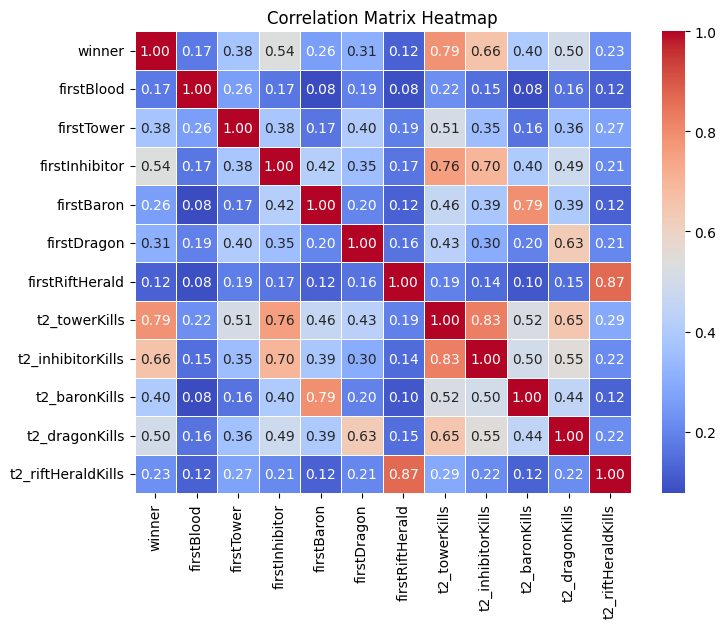

In [14]:
correlation_matrix = df_t2.corr()
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

The provided heatmap illustrates Pearson correlation coefficients, indicating the degree of linear relationship between various features. My primary focus is on the correlations involving the "winner" column, positioned at the topmost row. This approach aims to discern the factors that are most likely to play a crucial role in predicting a victory in the context of the dataset.

The analysis of the heatmap reveals that the number of tower and inhibitor kills exhibits the strongest correlation with a win, followed by monster kills. The positive correlation between monster kills and winning is logical, considering that monster kills grant valuable buffs that enhance a team's ability to defeat enemy players, as well as to secure towers and inhibitors. This connection is further evident when comparing the correlations between tower kills and monster kills, where, for example, the count of team 2 tower kills shows a strong positive correlation with team 2 monster kills.








In [15]:
firstBlood_wins = (df[(df['firstBlood'] == 1) & (df['winner'] == 1)].count())
p_firstBlood =  firstBlood_wins / (df[df['firstBlood'] == 1].count())

firstTower_wins = df[(df['firstTower'] == 1) & (df['winner'] == 1)].count()
p_firstTower = firstTower_wins / (df[df['firstTower'] == 1].count())

firstInhibitor_wins = df[(df['firstInhibitor'] == 1) & (df['winner'] == 1)].count()
p_firstInhibitor = firstInhibitor_wins / (df[df['firstInhibitor'] == 1].count())

firstBaron_wins = df[(df['firstBaron'] == 1) & (df['winner'] == 1)].count()
p_firstBaron = firstBaron_wins / (df[df['firstBaron'] == 1].count())

firstDragon_wins = df[(df['firstDragon'] == 1) & (df['winner'] == 1)].count()
p_firstDragon = firstDragon_wins / (df[df['firstDragon'] == 1].count())

firstRiftHerald_wins = df[(df['firstRiftHerald'] == 1) & (df['winner'] == 1)].count()
p_firstRiftHerald = firstRiftHerald_wins / (df[df['firstRiftHerald'] == 1].count())

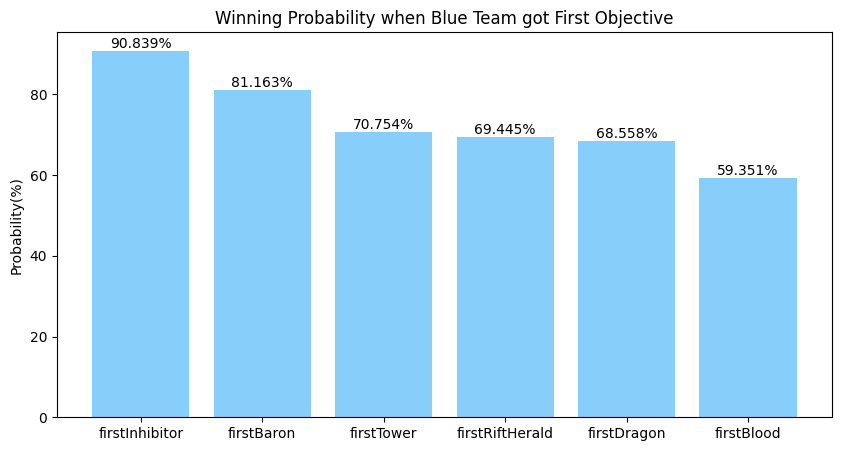

In [16]:
labels = ('firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald')
probabilities = [p_firstBlood['gameDuration'], p_firstTower['gameDuration'], p_firstInhibitor['gameDuration'], p_firstBaron['gameDuration'] ,p_firstDragon['gameDuration'] ,p_firstRiftHerald['gameDuration']]
probabilities = [i * 100 for i in probabilities]

# Create a list of tuples where each tuple contains a label and its corresponding probability
data_to_sort = zip(labels, probabilities)

# Sort the list of tuples based on the second element (probability) in each tuple
sorted_data = sorted(data_to_sort, key=lambda x: x[1], reverse=True)

# Unpack the sorted data into separate lists for labels and probabilities
labels, probabilities = zip(*sorted_data)

y_pos = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(y_pos, probabilities, align='center', alpha=1, color='lightskyblue')
plt.xticks(y_pos, labels)
plt.ylabel('Probability(%)')
plt.title('Winning Probability when Blue Team got First Objective')

# Add text annotation to the plot
for a, b in zip(y_pos, probabilities):
    # a: x-coordinate (position of the bar on the x-axis)
    # b: y-coordinate (height of the bar)
    # '%.3f' % b: Format the percentage with three decimal places
    # + '%': Concatenate '%' to the formatted percentage
    # ha='center': Horizontal alignment set to center (text at the center of the bar)
    # va='bottom': Vertical alignment set to bottom (text at the bottom of the bar)
    plt.text(a, b, '%.3f' % b + '%', ha='center', va='bottom')

plt.show()

Based on the bar charts above, it appears that clearly every 'first' objective obtained leads to a higher percentage of winning for the blue team.

We observe that when Team 1 secures the first inhibitor, they win the game 90.839% of the time. This action significantly influences victory as destroying at least one inhibitor is crucial for base destruction.

On the other hand, achieving first blood gives Team 1 a 59% chance of winning. However, considering that teams start with a 50% chance, the impact of securing first blood is relatively modest. So, it may not be worth risking resources to secure first blood. Losing it doesn't drastically reduce your chances of winning.

In [17]:
firstBlood_wins = (df[(df['firstBlood'] == 1) & (df['winner'] == 1)].count())
win_p_firstBlood =  firstBlood_wins / (df[df['firstBlood'] == 1].count())

firstTower_wins = df[(df['firstTower'] == 1) & (df['winner'] == 1)].count()
win_p_firstTower = firstTower_wins / (df[df['winner'] == 1].count())

firstInhibitor_wins = df[(df['firstInhibitor'] == 1) & (df['winner'] == 1)].count()
win_p_firstInhibitor = firstInhibitor_wins / (df[df['winner'] == 1].count())

firstBaron_wins = df[(df['firstBaron'] == 1) & (df['winner'] == 1)].count()
win_p_firstBaron = firstBaron_wins / (df[df['winner'] == 1].count())

firstDragon_wins = df[(df['firstDragon'] == 1) & (df['winner'] == 1)].count()
win_p_firstDragon = firstDragon_wins / (df[df['winner'] == 1].count())

firstRiftHerald_wins = df[(df['firstRiftHerald'] == 1) & (df['winner'] == 1)].count()
win_p_firstRiftHerald = firstRiftHerald_wins / (df[df['winner'] == 1].count())

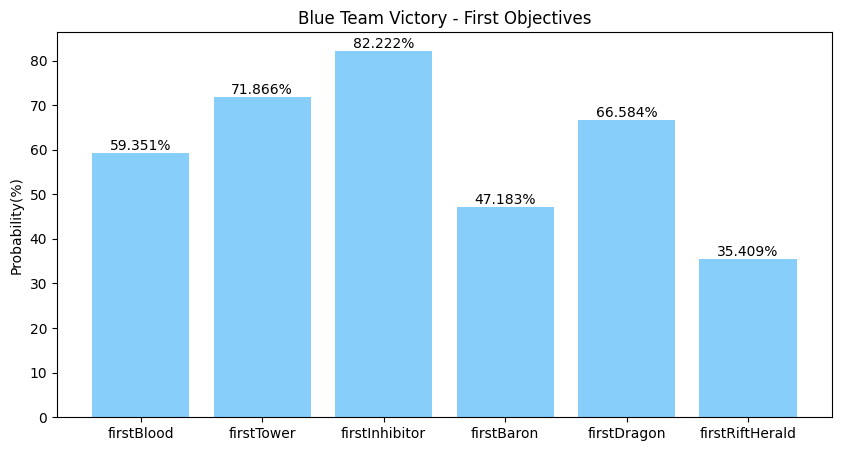

In [18]:
labels = ('firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald')
probabilities = [win_p_firstBlood['gameDuration'], win_p_firstTower['gameDuration'], win_p_firstInhibitor['gameDuration'],
                 win_p_firstBaron['gameDuration'], win_p_firstDragon['gameDuration'], win_p_firstRiftHerald['gameDuration']]

probabilities = [i * 100 for i in probabilities]

y_pos = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(y_pos, probabilities, align='center', alpha=1, color='lightskyblue')
plt.xticks(y_pos, labels)
plt.ylabel('Probability(%)')
plt.title('Blue Team Victory - First Objectives')

# Add text annotation to the plot
for a, b in zip(y_pos, probabilities):
    plt.text(a, b, '%.3f' % b + '%', ha='center', va='bottom')

plt.show()

Continuing our exploration of winning rates, it's evident that when Team 1 secures victory, a substantial 82.22% of those instances involve obtaining the first inhibitor. This emphasizes the significance of securing the first inhibitor as a crucial factor for winning.

In contrast, only 35% of the victorious matches for Team 1 are associated with obtaining the first Rift Herald. Comparing this to the overall winning rate of 69.445% in the initial chart, we can infer that while securing the first Rift Herald can enhance the winning rate to 69%, it is not a necessary condition for victory. The data indicates that only 35% of Team 1's winning games involve obtaining the first Rift Herald.

### 1.5 Import Champion Info  

In [19]:
# Read the JSON file containing champion information
championJson = pd.read_json('/content/drive/MyDrive/League of Legends Games/champion_info_2.json')

# Extract the 'data' column from the JSON and convert it to a DataFrame
champInfo = pd.read_json((championJson['data']).to_json(), orient='index')
champInfo.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [20]:
# Read the JSON file containing summoner spell information
spellJson = pd.read_json('/content/drive/MyDrive/League of Legends Games/summoner_spell_info.json')

# Extract the 'data' column from the JSON and convert it to a DataFrame
spellInfo = pd.read_json((spellJson['data']).to_json(),orient='index')
spellInfo.head()

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [21]:
# Set the 'id' column as the index of the champInfo DataFrame
champInfo.set_index('id', inplace=True)

champInfo.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [22]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id', 't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']

banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5', 't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]

sumSpellsCols = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

In [23]:
data[champCols].head(1)

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,8,432,96,11,112,104,498,122,238,412


In [24]:
data[sumSpellsCols].head(1)

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,12,4,3,4,4,7,11,6,4,14,11,4,4,7,6,4,14,4,4,3


In [25]:
def idToName(ID, championInfo):

    champ = championInfo['name'][ID]
    return champ

In [26]:
# Iterate through champion columns and replace champion IDs with names using the idToName function and champInfo
for c in champCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

# Iterate through ban columns and replace champion IDs with names using the idToName function and champInfo
for c in banCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

# Iterate through summoner spell columns and replace spell IDs with names using the idToName function and spellInfo
for c in sumSpellsCols:
    data[c] = data[c].apply(lambda x: idToName(x, spellInfo))


In [27]:
data[champCols].head(1)

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh


In [28]:
data[banCols].head(1)

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn


In [29]:
data[sumSpellsCols].head(1)

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust


Having successfully transformed the champion and summoner spell IDs into their corresponding names, we can now interpret the composition of the teams in the first row of the dataset. For Team 1, the champions were Vladimir, Bard, Kog'Maw, Master Yi, and Viktor, each equipped with specific summoner spells. On the other side, Team 2 comprised Graves, Xayah, Darius, Zed, and Thresh, each with their chosen summoner spells. As an example, Vladimir from Team 1 opted for Teleport and Flash. This information provides a clearer understanding of the champions and summoner spells chosen by each team in the specified game.







#### Now, we can do the same for the champion's classes:

In [30]:
def getTag(name, data):
    '''
    name: champion name as listed in dataframe
    data: champInfo

    used to get primary tag from champInfo
    '''
    tags = data['tags'][name][0]
    return tags

In [31]:
# Set the 'name' column as the index of the champInfo DataFrame
champInfo.set_index(['name'],inplace=True)

champInfo.head()

,tags,title,key
name,,,
Aatrox,"[Fighter, Tank]",the Darkin Blade,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri
Akali,[Assassin],the Fist of Shadow,Akali
Alistar,"[Tank, Support]",the Minotaur,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,Amumu


In [32]:
for col in champCols:
    data[col + '_tags'] = data[col].apply(lambda x: getTag(x, champInfo))

data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [33]:
data.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [34]:
champion_picks = pd.concat([data['t1_champ1id'],data['t1_champ2id'],data['t1_champ3id'],data['t1_champ4id'],data['t1_champ5id'],
                           data['t2_champ1id'],data['t2_champ2id'],data['t2_champ3id'],data['t2_champ4id'],data['t2_champ5id']],
                           ignore_index=True)
sorted_picks = sorted(champion_picks)

champion_bans = pd.concat([data['t1_ban1'],data['t1_ban2'],data['t1_ban3'],data['t1_ban4'],data['t1_ban5'],
                          data['t2_ban1'],data['t2_ban2'],data['t2_ban3'],data['t2_ban4'],data['t2_ban5']],
                          ignore_index=True)
sorted_bans = sorted(champion_bans)

Text(0.5, 1.0, 'Champion Bans')

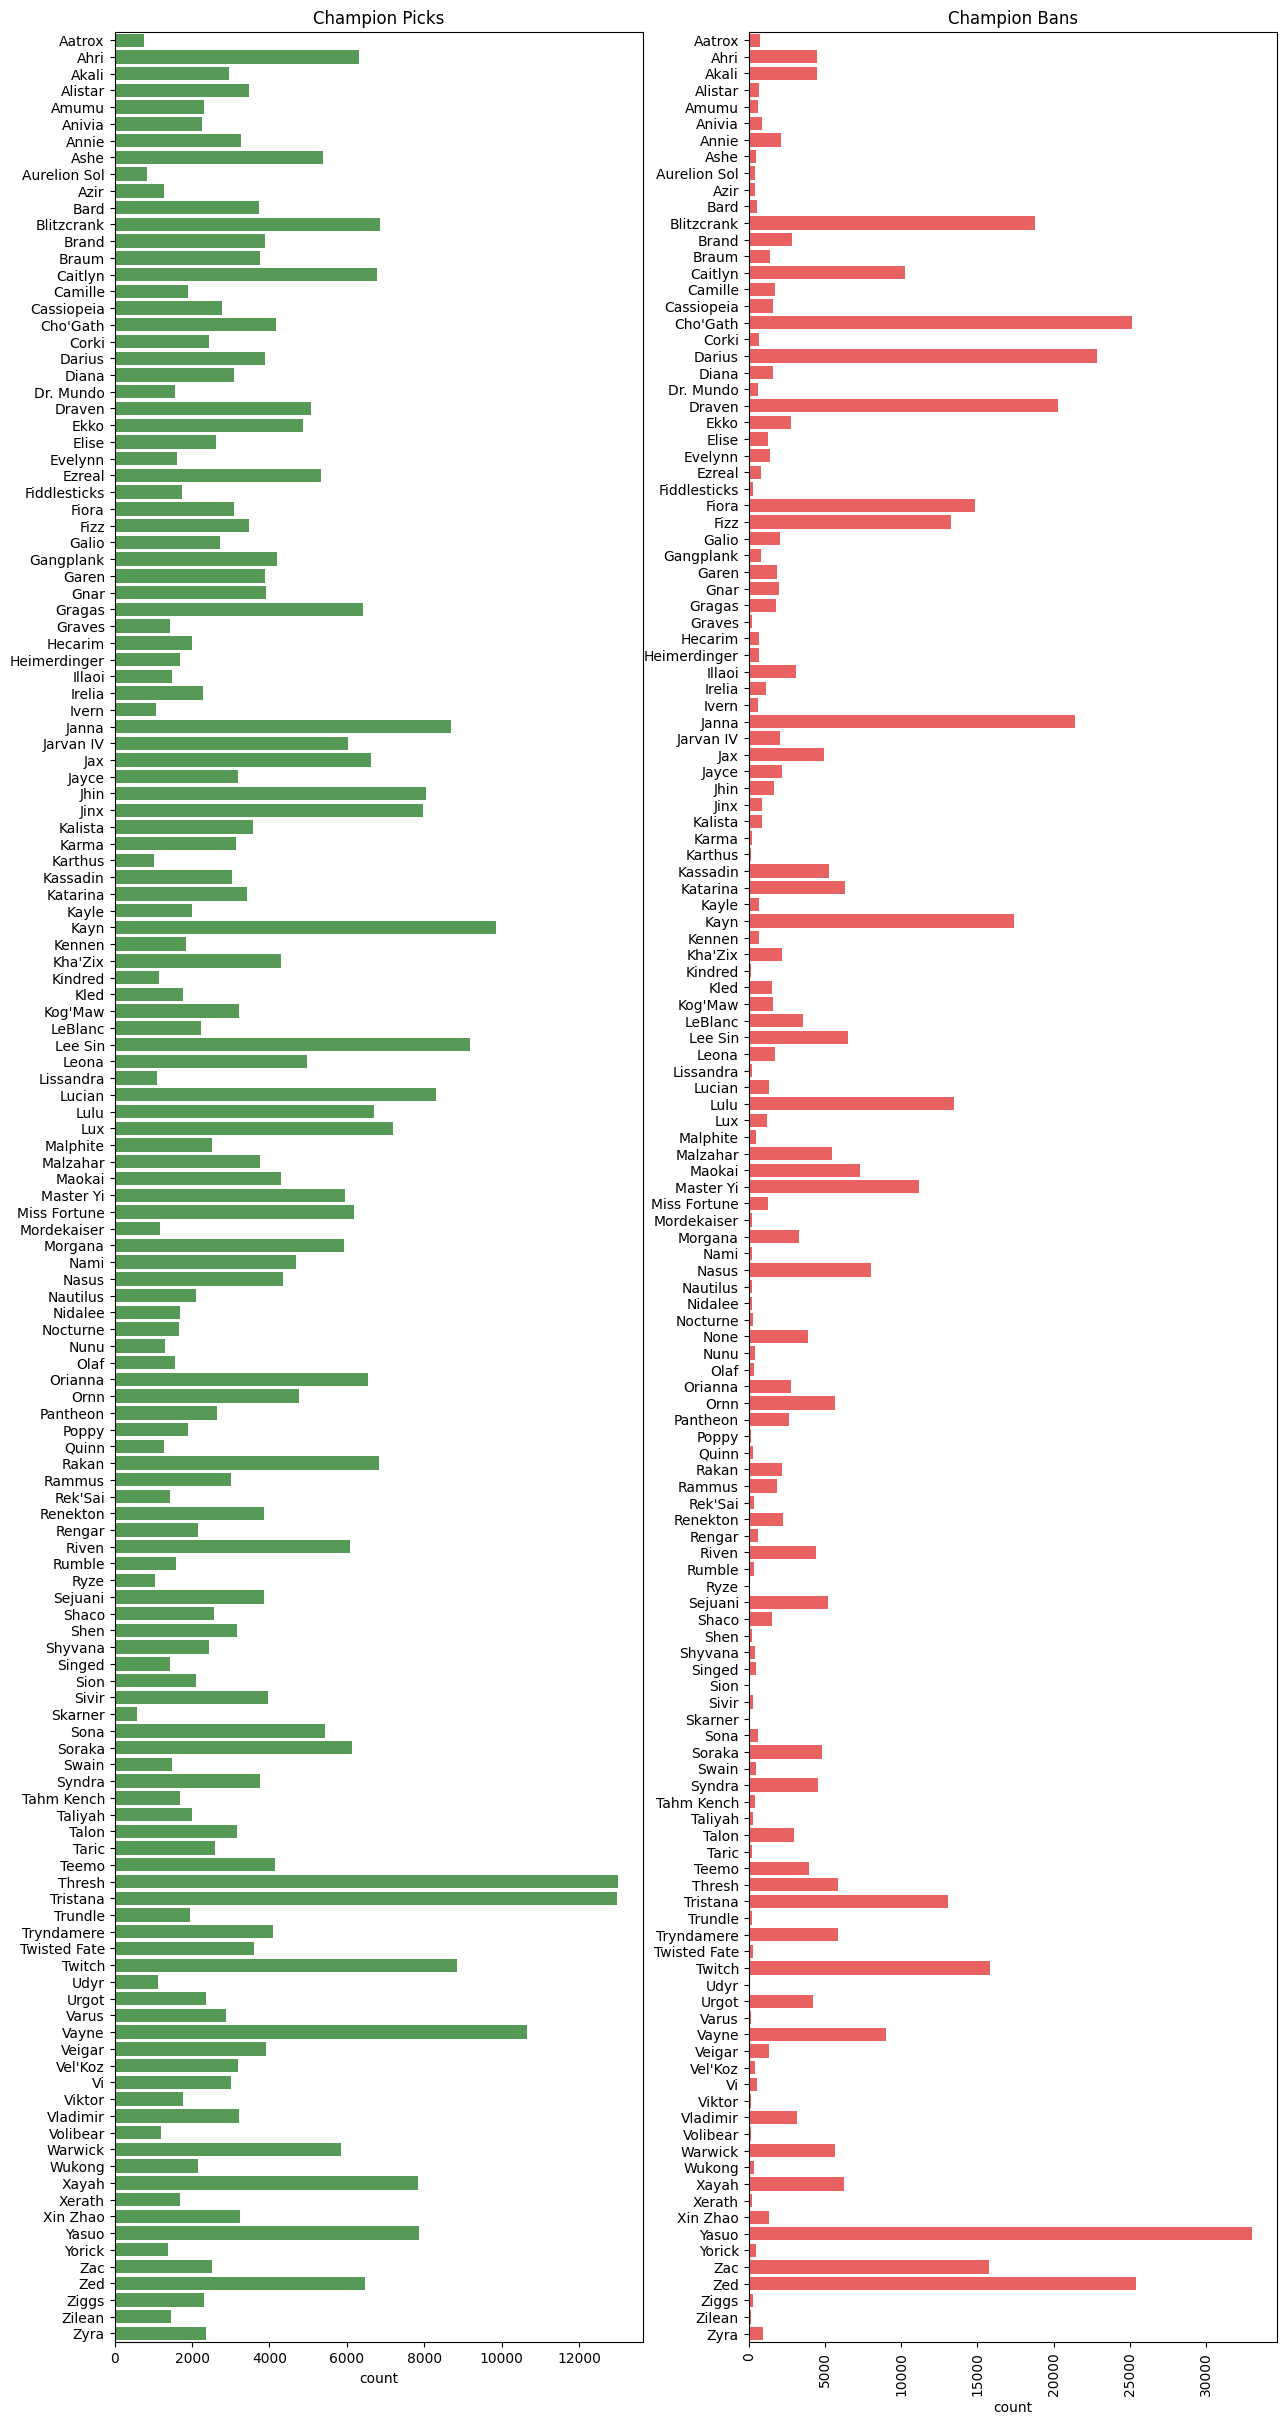

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sorted_picks,  ax=ax1, color='green', alpha=0.7)
sns.countplot(y=sorted_bans,  ax=ax2, color='red', alpha=0.7)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

Here, we can see the choices of champion picks and bans. We can find various conclusions from this graph - it's intriguing to observe that Yasuo receives a significant number of bans, despite not being among the top 5 most frequently picked champions. This is in contrast to Thresh, who is highly picked but experiences comparatively fewer bans.







Let's obtain what the most banned and most picked champions are:]

In [36]:
champion_pick_counts = champion_picks.value_counts()

# Create a new DataFrame with counts as a column
pick_counts = pd.DataFrame({'champion_name': champion_pick_counts.index, 'count': champion_pick_counts.values})

# Sort the new DataFrame based on the 'count' column in increasing order
pick_counts_sorted = pick_counts.sort_values(by='count', ascending = False)

top_10_picks = pick_counts_sorted.head(10)

champion_ban_counts = champion_bans.value_counts()

# Create a new DataFrame with counts as a column
ban_counts = pd.DataFrame({'champion_name': champion_ban_counts.index, 'count': champion_ban_counts.values})

# Sort the new DataFrame based on the 'count' column in increasing order
ban_counts_sorted = ban_counts.sort_values(by='count', ascending = False)

top_10_bans = ban_counts_sorted.head(10)

Now lets plot the top 10 picks and bans:

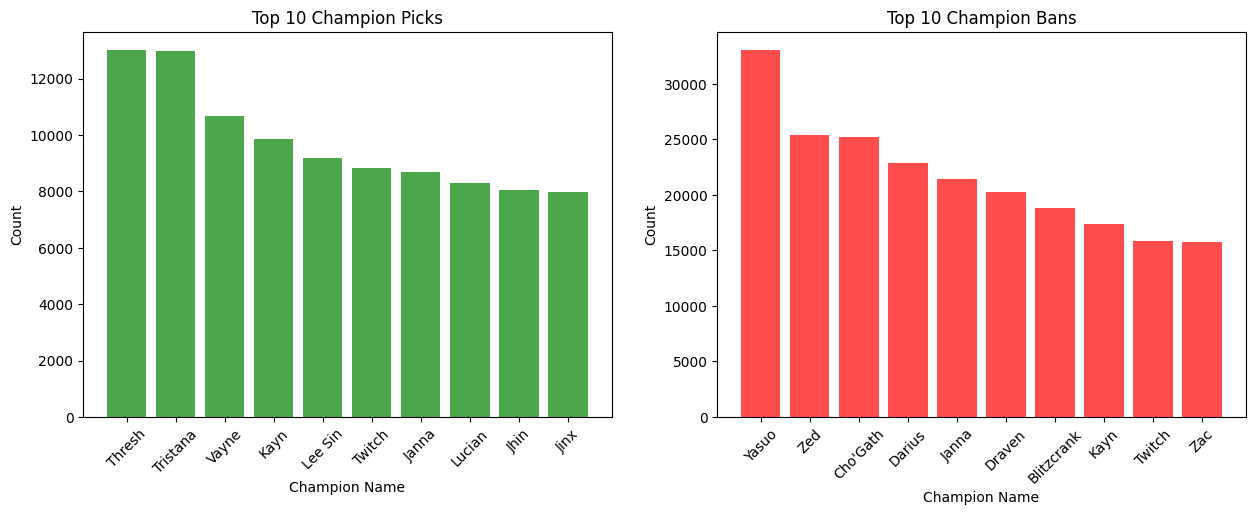

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15, 5))

# Plot Top 10 Champion Picks
ax1.bar(top_10_picks['champion_name'], top_10_picks['count'], color='green', alpha=0.7)
ax1.set_title('Top 10 Champion Picks')
ax1.set_xlabel('Champion Name')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Plot Top 10 Champion Bans
ax2.bar(top_10_bans['champion_name'], top_10_bans['count'], color='red', alpha=0.7)
ax2.set_title('Top 10 Champion Bans')
ax2.set_xlabel('Champion Name')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.show()


Now, I want to visualize the classes of champions and summoner spells most used.

In [38]:
tags = ['t1_champ1id_tags', 't1_champ2id_tags', 't1_champ3id_tags',
       't1_champ4id_tags', 't1_champ5id_tags', 't2_champ1id_tags',
       't2_champ2id_tags', 't2_champ3id_tags', 't2_champ4id_tags',
       't2_champ5id_tags']

Text(0.5, 1.0, 'Champion Class Count')

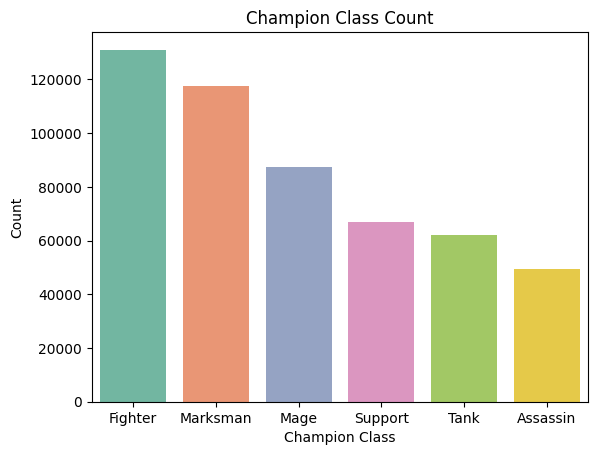

In [39]:
tag_totals = data[tags].apply(pd.value_counts)
tag_totals['count'] = tag_totals[tags].sum(axis=1)
ax = sns.barplot(x=tag_totals.index, y=tag_totals['count'], hue=tag_totals.index, palette='Set2')
ax.set_xlabel('Champion Class')
ax.set_ylabel('Count')
ax.set_title('Champion Class Count')

<Axes: xlabel='None', ylabel='count'>

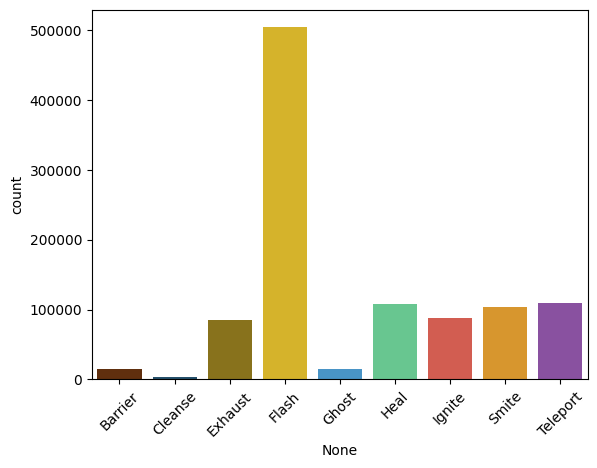

In [40]:
spellsTotals = data[sumSpellsCols].apply(pd.value_counts)
spellsTotals['count'] = spellsTotals[sumSpellsCols].sum(axis=1)
spellsTotals_sorted = spellsTotals.sort_values(by='count', ascending=False)

spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
plt.xticks(rotation=45)

sns.barplot(x=spellsTotals.index,y=spellsTotals['count'], palette=spellColors, hue=spellsTotals.index)



### Conclusions:
A higher number of tower, inhibitor, and monster kills shows a correlation with winning, whereas fewer kills in these categories are linked with losing.

When it comes to significance, tower and inhibitor kills stand out the most in their correlation with winning, surpassing the importance of monster kills.

The act of securing the first inhibitor is notably associated with winning, but it's worth noting that obtaining other first kills, such as Baron, Dragon, and towers, also plays a crucial role in achieving victory.
Based on the above data and conclusions, focusing on tower kills and securing the first inhibitor before the enemy, as well as getting dragon kills, is likely a safe and consistent strategy for winning.

### Limitations/Generalizability:

Firstly, it's crucial to acknowledge that all the data presented pertains specifically to Season 9. As highlighted earlier in this analysis, the dynamics of the game can undergo changes from one season to another. Consequently, any findings drawn from the analysis of Season 9 games may not be universally applicable to games in subsequent seasons.

Secondly, the dataset lacks information regarding the specific ranks of the games or whether they are randomly sampled from all ranked games. The absence of such details raises questions about the potential impact on the generalizability of the conclusions drawn. Different ranks, such as Diamond or Bronze, may exhibit distinct gameplay strategies, and the exclusion of this information could influence the broader applicability of the aforementioned findings. For example, Diamond players might employ different strategies compared to their Bronze counterparts.

ALso, data is sourced exclusively from the EUW server. Consequently, there's a possibility that the playing styles of EUW players differ from those in other regions, such as NA. Lastly, it's worth noting that the data overlooks various other game components, including team minion kills, gold accumulation, and more, which are likely integral to achieving victory in matches.